# Integrantes
- Aguilar Martínez Erick Yair
- Martínez Muñoz Alan Magno
- Mendoza Hernández Carlos Emiliano

El conjunto de datos *anorexia*, dentro del paquete *MASS* de R reune datos de 72 pacientes que participaron en un experimento para determinar la efectividad de terapias. Se aplicaron tres tipos: terapia familiar (*FT*), terapia cognitiva conductual (*CBT*) y un grupo de control sin terapia (*Cont*). El objetivo del análisis es determinar la efectividad de los tratamientos, así como estimar la media de ganancia de peso, comparando el peso antes y después del
tratamiento (*Prewt* y *Postwt*). como evidencia de que son ganancias reales.

In [1]:
library("MASS")
head(anorexia)
str(anorexia)

,Treat,Prewt,Postwt
,<fct>,<dbl>,<dbl>
1,Cont,80.7,80.2
2,Cont,89.4,80.1
3,Cont,91.8,86.4
4,Cont,74.0,86.3
5,Cont,78.1,76.1
6,Cont,88.3,78.1


'data.frame':	72 obs. of  3 variables:
 $ Treat : Factor w/ 3 levels "CBT","Cont","FT": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prewt : num  80.7 89.4 91.8 74 78.1 88.3 87.3 75.1 80.6 78.4 ...
 $ Postwt: num  80.2 80.1 86.4 86.3 76.1 78.1 75.1 86.7 73.5 84.6 ...


In [2]:
help(anorexia)

anorexia                 package:MASS                  R Documentation

_A_n_o_r_e_x_i_a _D_a_t_a _o_n _W_e_i_g_h_t _C_h_a_n_g_e

_D_e_s_c_r_i_p_t_i_o_n:

     The 'anorexia' data frame has 72 rows and 3 columns.  Weight
     change data for young female anorexia patients.

_U_s_a_g_e:

     anorexia
     
_F_o_r_m_a_t:

     This data frame contains the following columns:

     'Treat' Factor of three levels: '"Cont"' (control), '"CBT"'
          (Cognitive Behavioural treatment) and '"FT"' (family
          treatment).

     'Prewt' Weight of patient before study period, in lbs.

     'Postwt' Weight of patient after study period, in lbs.

_S_o_u_r_c_e:

     Hand, D. J., Daly, F., McConway, K., Lunn, D. and Ostrowski, E.
     eds (1993) _A Handbook of Small Data Sets._ Chapman & Hall, Data
     set 285 (p. 229)

     (Note that the original source mistakenly says that weights are in
     kg.)

_R_e_f_e_r_e_n_c_e_s:

   

- Grafica el peso antes y después del experimento identificando los puntos de cada grupo con diferentes formas y colores (como se añadirán más elementos a la gráfica, se sugiere usar *ggplot*)

In [3]:
library(ggplot2)

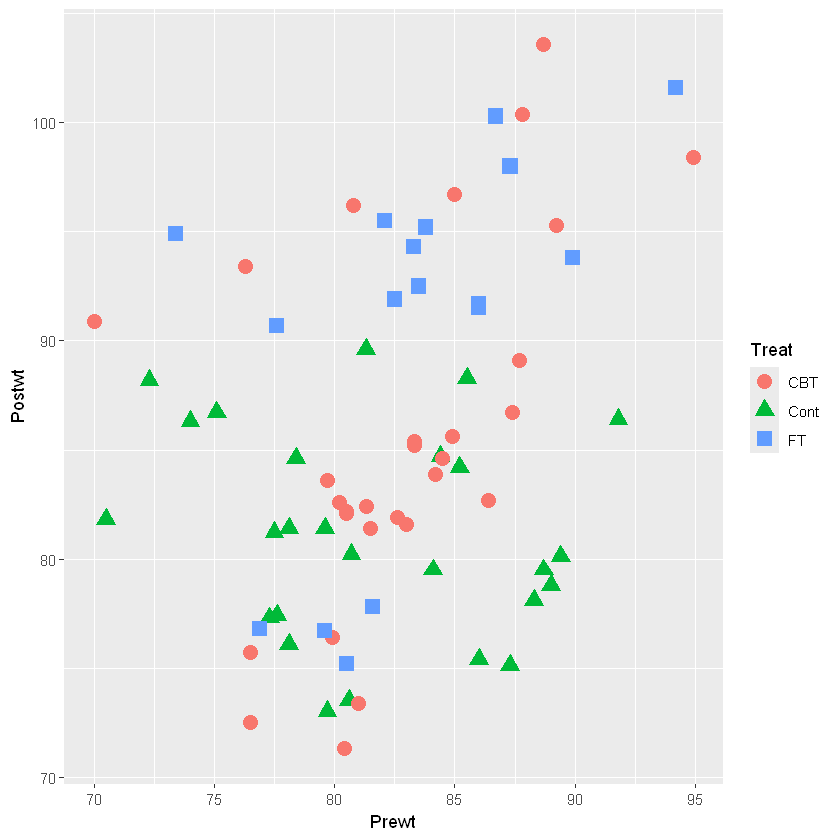

In [4]:
plt <- ggplot(anorexia, aes(x = Prewt, y = Postwt,
                            colour = Treat, shape = Treat)) +
  geom_point(size = 4)
plt

- Agrega líneas de regresión por mínimos cuadrados usando los mismos colores para identificarlos (*ggplot* regala los intervalos de confianza)

`geom_smooth()` using formula = 'y ~ x'


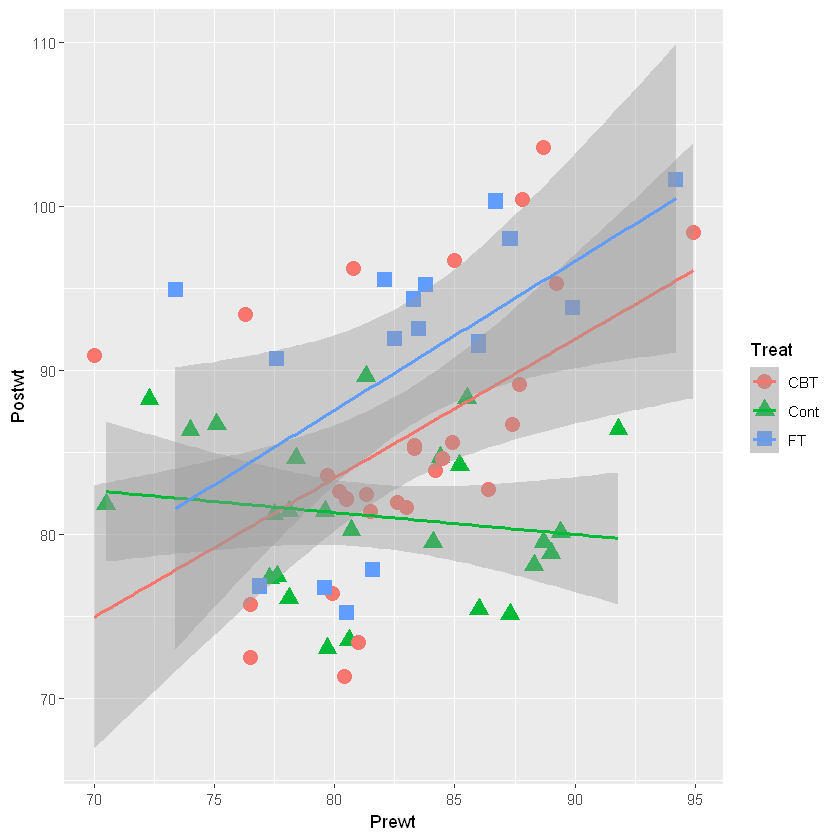

In [5]:
plt <- plt + geom_smooth(method = "lm")
plt

- Agrega una línea con pendiente 1 y ordenada al origen 0

`geom_smooth()` using formula = 'y ~ x'


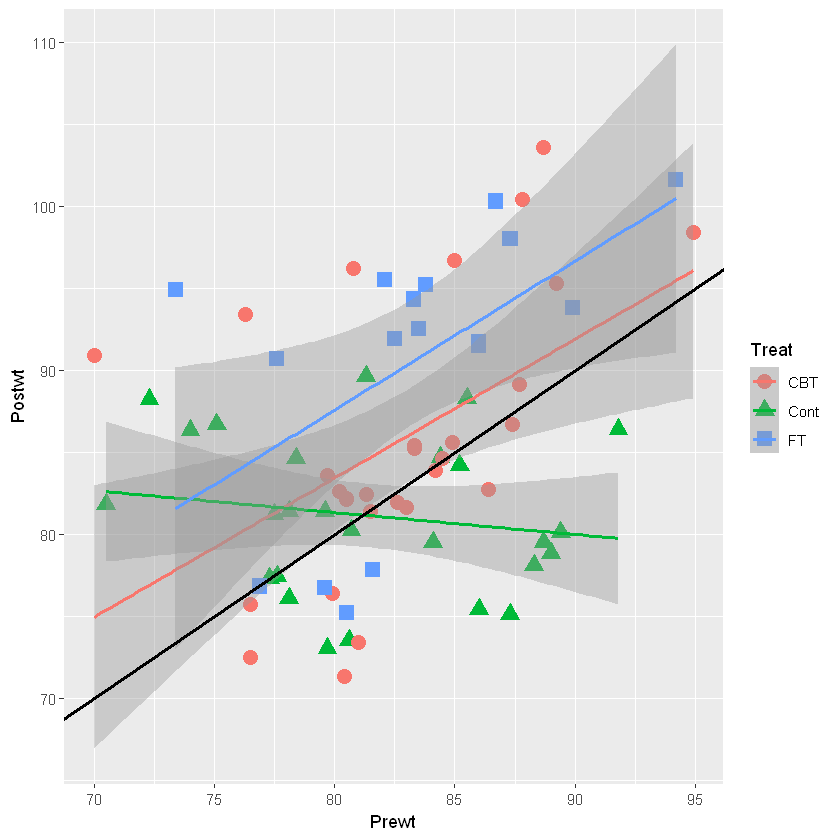

In [6]:
plt <- plt + geom_abline(slope = 1, intercept = 0,
                         color = "black", linewidth = 1)
plt

- ¿Se puede concluir algo sobre la eficacia de los tratamientos?

FT parece tener una tendencia positiva más pronunciada, Esto indica que, en promedio, las personas que recibieron este tratamiento aumentaron su peso.

CBT también muestra una tendencia ascendente, aunque menos pronunciada que FT, lo que sugiere un menor aumento de peso en comparación con FT.

Cont tiene una pendiente cercana a cero, lo que indica que este grupo de control no muestra un cambio significativo en el peso después del tratamiento en comparación con el peso inicial. Esto es consistente con la ausencia de tratamiento o de un tratamiento con menor impacto en el peso.

Sin embargo, es importante tener en cuenta la variabilidad observada y realizar un análisis estadístico más detallado para confirmar estas observaciones.

- Otra forma de ver los datos es dividir la gráfica de acuerdo al tipo de tratamiento; se puede realizar con *facet_grid*:

`geom_smooth()` using formula = 'y ~ x'


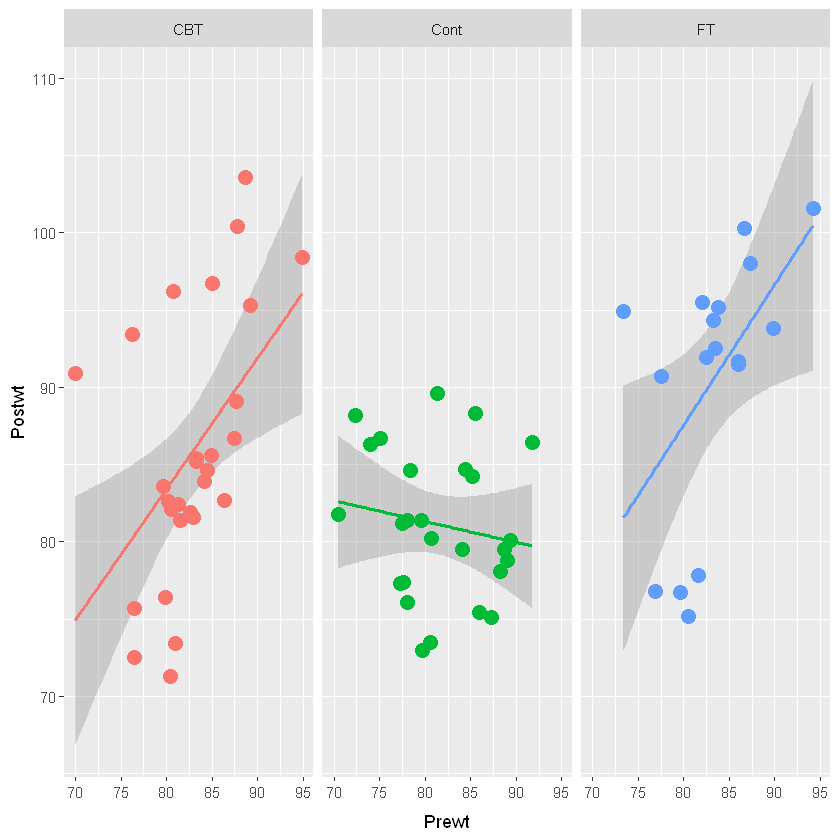

In [7]:
ggplot(anorexia, aes(x = Prewt, y = Postwt, colour = Treat)) +
  facet_grid(. ~ Treat) +
  geom_smooth(method = "lm") +
  geom_point(size = 4) +
  scale_colour_discrete(guide = "none")

- Muestra el resumen de cada modelo de regresión. ¿Para qué grupos existe evidencia de una relación entre los pesos? Explica la diferencia entre el grupo de control y los grupos con terapias; genera una conclusión al respecto.

In [8]:
# Filtrar datos por tratamiento
cbt <- subset(anorexia, Treat == "CBT")
ft <- subset(anorexia, Treat == "FT")
cont <- subset(anorexia, Treat == "Cont")

In [10]:
# Coeficientes de la regresión para cada tratamiento
lm_cbt <- lm(cbt$Postwt ~ cbt$Prewt)
b_cbt <- lm_cbt$coefficients
b_cbt

(Intercept)   cbt$Prewt 
 15.5772439   0.8479816

In [11]:
lm_ft <- lm(ft$Postwt ~ ft$Prewt)
b_ft <- lm_ft$coefficients
b_ft

(Intercept)    ft$Prewt 
 14.8197530   0.9092262

In [12]:
lm_cont <- lm(cont$Postwt ~ cont$Prewt)
b_cont <- lm(cont$Postwt ~ cont$Prewt)$coefficients
b_cont

(Intercept)  cont$Prewt 
 92.0514708  -0.1341845

Resumen estadístico

In [14]:
# CBT
summary(lm_cbt)


Call:
lm(formula = cbt$Postwt ~ cbt$Prewt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.455  -3.720  -1.740   2.349  15.964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  15.5772    23.9200   0.651  0.52041   
cbt$Prewt     0.8480     0.2888   2.936  0.00671 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.405 on 27 degrees of freedom
Multiple R-squared:  0.242,	Adjusted R-squared:  0.214 
F-statistic: 8.622 on 1 and 27 DF,  p-value: 0.006713


In [15]:
confint(lm_cbt)

,2.5 %,97.5 %
(Intercept),-33.5025626,64.657050
cbt$Prewt,0.2554208,1.440542


In [16]:
# FT
summary(lm_ft)


Call:
lm(formula = ft$Postwt ~ ft$Prewt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.812  -2.759   1.760   4.187  13.343 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  14.8198    30.6500   0.484   0.6357  
ft$Prewt      0.9092     0.3676   2.473   0.0258 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.377 on 15 degrees of freedom
Multiple R-squared:  0.2897,	Adjusted R-squared:  0.2423 
F-statistic: 6.117 on 1 and 15 DF,  p-value: 0.02584


In [17]:
confint(lm_ft)

,2.5 %,97.5 %
(Intercept),-50.5092108,80.148717
ft$Prewt,0.1256384,1.692814


In [18]:
# Cont
summary(lm_cont)


Call:
lm(formula = cont$Postwt ~ cont$Prewt)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3570 -3.7048 -0.5507  3.8755  8.4577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.0515    13.6900   6.724 5.91e-07 ***
cont$Prewt   -0.1342     0.1675  -0.801    0.431    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.779 on 24 degrees of freedom
Multiple R-squared:  0.02606,	Adjusted R-squared:  -0.01453 
F-statistic: 0.6421 on 1 and 24 DF,  p-value: 0.4308


In [19]:
confint(lm_cont)

,2.5 %,97.5 %
(Intercept),63.7968024,120.3061391
cont$Prewt,-0.4798096,0.2114406


FT

Pendiente: 0.9092 (con un valor p = 0.0258). Sugiere una relación positiva entre el peso inicial y el peso posterior.

Múltiple R-cuadrado: 0.2897. Esto indica que el 28.97% de la variabilidad en el peso posterior está explicada por el peso inicial.

Existe una relación significativa entre el peso inicial y el peso posterior. El aumento en el peso inicial tiende a estar asociado con un aumento en el peso posterior.

CBT 

Pendiente: 0.8480 (con un valor p = 0.00671). Esto indica una relación positiva y significativa entre el peso inicial y el peso posterior en este grupo, ya que el valor p es menor a 0.01.

Múltiple R-cuadrado: 0.242. Esto indica que el 24.2% de la variabilidad en el peso posterior está explicado por el peso inicial en este modelo.

Al igual que en el grupo FT, existe evidencia significativa de una relación positiva entre los pesos en este grupo. A medida que aumenta el peso inicial, también tiende a aumentar el peso posterior.

Cont

Pendiente: -0.1342 (con un valor p = 0.431). Este resultado indica que no hay una relación significativa entre el peso inicial y el peso posterior en el grupo de control, ya que el valor p es mayor a 0.05 (no significativo).

Múltiple R-cuadrado: 0.02606, lo que indica que solo el 2.61% de la variabilidad en el peso posterior está explicado por el peso inicial.

No hay evidencia significativa de una relación entre el peso inicial y el peso posterior en el grupo de control.

Los tratamientos de CBT y FT parecen tener una relación significativa entre los pesos inicial y posterior, lo que indica un impacto de las terapias en el peso de los participantes. En cambio, el grupo de control no muestra ninguna relación significativa entre el peso inicial y el peso posterior, lo que refuerza la idea de que sin intervención no se observan cambios significativos. Esto apoya la eficacia de las terapias, particularmente la terapia física (FT), que presenta la relación más fuerte entre los pesos.